<a href="https://colab.research.google.com/github/shinjangwoon/TIL/blob/master/Data%20Analysis/%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정규방정식


In [1]:
# 선형 데이터 생성
import numpy as np

X = 2 * np.random.rand(100 ,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# 정규 방정식 사용하여 계산
# numpy 선형대수 모듈(np.linalg)에 있는 inv() 함수 사용하여 역행렬을 계산하고
# dot() 메서드를 사용해 행렬 곱셈
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1를 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.03928791],
       [2.93941175]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1를 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03928791],
       [9.91811142]])

In [5]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [6]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')


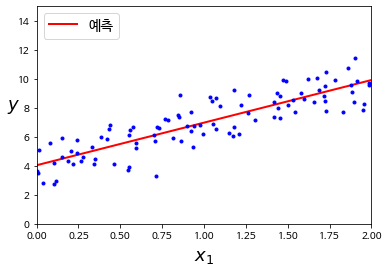

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


 
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# 사이킷런에서 선형 회귀 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.03928791]), array([[2.93941175]]))

In [10]:
lin_reg.predict(X_new)

array([[4.03928791],
       [9.91811142]])

In [11]:
# LinearRegression 클래스는 scipy.linalg.lstsq() 함수(최소제곱)를 기반으로 함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.03928791],
       [2.93941175]])

In [12]:
# np.linalg.pinv() 함수를 사용해 유사역행렬을 구할 수 있음
np.linalg.pinv(X_b).dot(y)

array([[4.03928791],
       [2.93941175]])

# 경사하강법

In [13]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.03928791],
       [2.93941175]])

- 정규방정식으로 찾은 것과 같음

In [15]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

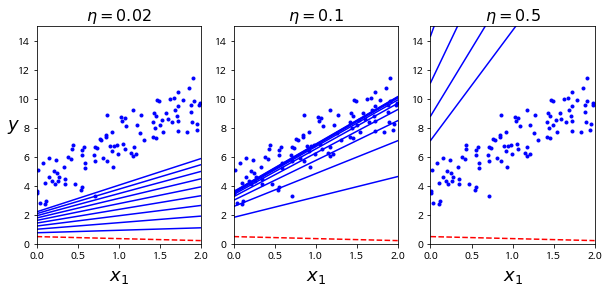

In [16]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()

In [17]:
weight_path_sgd = []
m = len(X_b)
np.random.seed(42)

Epoch :010, weight = 
 [[3.8876576 ]
 [2.72741465]]
Epoch :020, weight = 
 [[3.43546483]
 [2.98413983]]
Epoch :030, weight = 
 [[4.2706621 ]
 [2.58035672]]
Epoch :040, weight = 
 [[3.68851218]
 [2.36301912]]
Epoch :050, weight = 
 [[4.28851812]
 [2.46310281]]


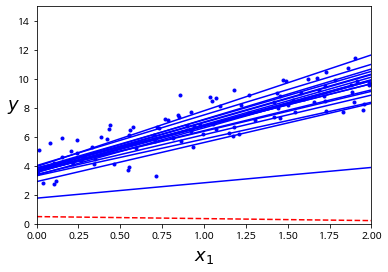

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

weight = np.random.randn(2, 1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(weight)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(weight) - yi)
        eta - learning_schedule(epoch * m + i)
        weight = weight - eta * gradients
        weight_path_sgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))
        
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

- 한 반복에서 m번 되풀이 되고, 이때 각 반복을 에포크(epoch)라고 함
- 50번만 반복하고도 좋은 값을 얻음

# SGDRegressor 
- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본 값으로 제곱 오차 비용 함수를 최적화하는 클래스

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01080759]), array([2.92787201]))

- 정규방정식으로 구한 값과 매우 비슷한 값을 얻음

# 미니배치 경사 하강법

In [21]:
weight_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
weight = np.random.randn(2,1)  # random init

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(weight) - yi)
        eta = learning_schedule(t)
        weight = weight - eta * gradients
        weight_path_mgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))

Epoch :010, weight = 
 [[4.03304011]
 [2.96011079]]
Epoch :020, weight = 
 [[3.95593039]
 [2.83531214]]
Epoch :030, weight = 
 [[4.10404293]
 [3.01845895]]
Epoch :040, weight = 
 [[3.93058089]
 [2.82329061]]
Epoch :050, weight = 
 [[4.00799029]
 [2.90237332]]
Epoch :060, weight = 
 [[3.95228294]
 [2.84858407]]
Epoch :070, weight = 
 [[4.07976532]
 [2.97958043]]
Epoch :080, weight = 
 [[4.05659828]
 [2.96615617]]
Epoch :090, weight = 
 [[4.06460524]
 [2.96091451]]
Epoch :100, weight = 
 [[4.13040731]
 [3.05811746]]


In [22]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

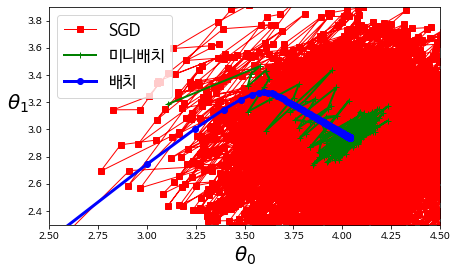

In [23]:
plt.figure(figsize=(7,4))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 다항 회귀

In [24]:
np.random.seed(42)

In [25]:
# 예시
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


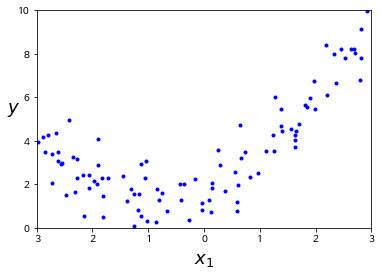

In [26]:
# 시각화
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
# 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환 
# 훈련 세트에 있는 각 특성을 제곱(2차다항)하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
# LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


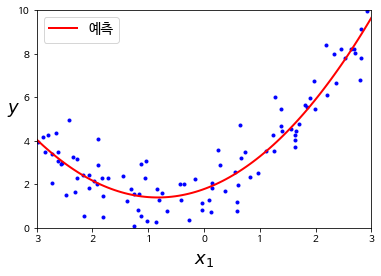

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 학습 곡선

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


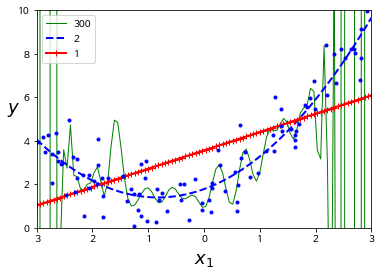

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- 고차 다항 회귀를 사용하면 선형 회귀(linear regression)보다 Train Set에 Overfitting 될 위험이 크다.

In [32]:
# Overfitting을 확인하기 위해 학습 곡선 사용
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습 곡선을 그리는 함수 정의
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("훈련 세트 크기", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)  

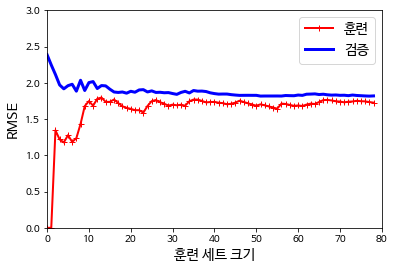

In [33]:
# 단순 선형 회귀 모델(직선)의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()      

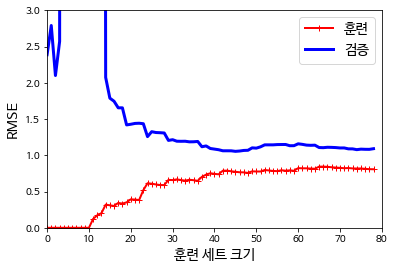

In [35]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression()),
])
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

- 차이점
    - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮습니다.
    - 두 곡선 사이의 공간이 있음 -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻 ( 과대적합 모델의 특징 ). 그러나 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워짐